이산형 확률분포

In [ ]:
#1차원 이산분포
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x/21
    else:
        return 0
X = [x_set,f]

In [ ]:
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set,prob))

In [ ]:
plt.figure(figsize = (10,10))
plt.bar(x_set,prob)
plt.xlabel('variables')
plt.ylabel('probability')

In [ ]:
np.all(prob>0)

In [ ]:
np.sum(prob)

In [ ]:
# 누적 분포 함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <=x])

In [ ]:
F(6)

In [ ]:
# 확률 변수의 변환 : 확률변수 X 에 2를 곱하고 3은 더한 2X+3
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob= np.array([f(x_k) for x_k in x_set])
dict(zip(y_set,prob))

In [ ]:
#1차원 이산형 확률변수 지표
#평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지효가 되며 기대값이라고도 부른다
np.sum([x_k *f(x_k) for x_k in x_set])


In [ ]:
# 확률변수의 기댓값은 확률 변수를 무제한 시행하여 얻은 실현값의 평균
sample= np.random.choice(x_set,int(1e6),p=prob)
np.mean(sample)

In [ ]:
# 일반화
def E(X,g=lambda x: x):
    x_set ,f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [ ]:
E(X)

In [ ]:
E(X,g=lambda x:2*x+3)

In [ ]:
# 기댓값의 선형성
2 * E(X) +3

In [ ]:
# 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

In [ ]:
# 일반화
def V(X,g = lambda x:x):
    x_set ,f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [ ]:
V(X)

In [ ]:
V(X,g=lambda x:2*x)

In [ ]:
# 2차원 이산형 확률분포
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [ ]:
#결합확률함수
def f_XY(x,y):
    if 1<=y<=6 and 1<=x-y<=6:
        return y*(x-y)/441
    else:
        return 0

In [ ]:
XY = [x_set,y_set,f_XY]
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(prob.shape[0])+0.5,minor=False)
ax.set_xticklabels(np.arange(1,7),minor = False)
ax.set_yticklabels(np.arange(2,13),minor = False)
# y축을 내림차순의 숫자가 되게하여 위아래를 역전시킴
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)

In [ ]:
np.all(prob>=0)

In [ ]:
np.sum(prob)

In [ ]:
# 주변 확률 분포 (marginal probability distribution)
# 확률변수 (X,Y)는 결합확률분포에 의해 동시에 정의되지만 개별 확률 변수에만 흥미가 있을 수 있다.
# 확률변수 X만의 움직임, 즉 확률변수 X의 확률함수를 알고 싶은 상황

In [ ]:
def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

In [ ]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [ ]:
X = [x_set,f_X]
Y = [y_set,f_Y]

In [ ]:
X

In [ ]:
Y

In [ ]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_label')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set,prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_label')
ax2.set_ylabel('probability')
ax2.set_xticks(y_set)

In [ ]:
# 2차원 이산형 확률분포의 지표
# 기댓값
np.sum([x_i * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
li =[]
for y in y_set:
    for x in x_set:
        li.append(x*f_XY(x,y))
np.sum(li)

In [ ]:
def E(XY,g):
    x_set,y_set, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
mean_X = E(XY,lambda x,y:x)
mean_X

In [ ]:
mean_Y = E(XY,lambda x,y:y)
mean_Y

In [ ]:
# 기대값의 선형성
E(XY,lambda x,y:2*x+3*y)

In [ ]:
# 분산: X의 분산이라면 X에 관한 편차 제곱의 기대값으로 구할 수 있다
np.sum([(x_i-mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
np.sum([(y_j-mean_Y)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
def V(XY,g):
    x_set,y_set, f_XY = XY
    mean = E(XY,g)
    return np.sum([(g(x_i,y_j)-mean)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

In [ ]:
V(XY,lambda x,y:3*y)

In [ ]:
# 공분산
def Cov(XY):
    x_set,y_set,f_XY = XY
    mean_X = E(XY,lambda x,y:x)
    mean_Y = E(XY,lambda x,y:y)
    return np.sum([(x_i-mean_X) * (y_j - mean_Y) *f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

Cov(XY)

In [ ]:
# 상관계수 : 공분산을 각각의 표준편차로 나누어 산출
var_x = V(XY,lambda x,y:x)
var_y = V(XY,lambda x,y:y)
cov_xy = Cov(XY)
cov_xy/np.sqrt(var_x*var_y)

In [ ]:
# 분산과 공분산의 공식
a = 2
b = 3
a**2*var_x+b**2*var_y +2*a*b*cov_xy

대표적인 이산형 확률분포

In [185]:
# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-','--',':']

def E(X,g = lambda x:x):
    x_set , f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

def V(X,g = lambda x:x):
    x_set , f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2*f(x_k) for x_k in x_set])

print(E(X))
print(V(X))

def check_prob(X): # 확률분포를 인수로 가지며 ㄴ기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob>=0), 'minus probability'
    prob_sum = np.around(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probability {prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {V(X):.4}')
    
def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기대값을 그리기 위한 함수
    x_set,f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize = (15,4))
    ax = fig.add_subplot(111)
    ax.bar(x_set,prob,label = 'prob')
    ax.vlines(E(X),0,1,label = 'mean',color='crimson')
    ax.set_xticks(np.append(x_set,E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()

0.3
0.20999999999999996


#### 베르누이 분포
- 가장 기본적인 이산형 확률 분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패
- 동전을 던져 앞면이 나올 확률, 주사위를 한번 굴려 6이 나오지 않을 확률

In [130]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [132]:
p = 0.3
X = Bern(p)

In [133]:
check_prob(X)

expected value 0.3
variance 0.21


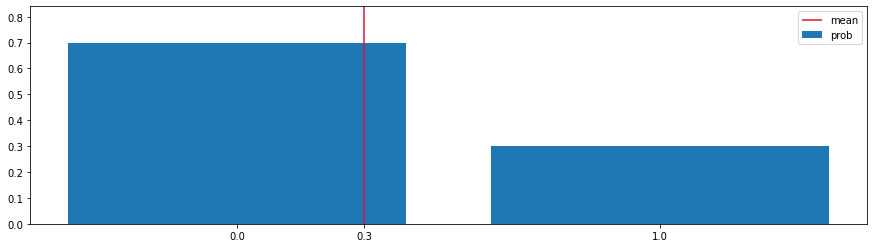

In [186]:
plot_prob(X)

In [135]:
rv = stats.bernoulli(p)

In [136]:
rv.pmf(0),rv.pmf(1)

(0.7, 0.3)

In [137]:
rv.pmf([0,1])

array([0.7, 0.3])

In [138]:
rv.cdf([0,1])

array([0.7, 1. ])

In [139]:
rv.mean(), rv.var()

(0.3, 0.21)

#### 이항 분포
- 성공 확률이 p 인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포

f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,...,n\}$)

       0            (otherwise)

In [140]:
from scipy.special import comb
def Bin(n,p):
    x_set = np.arange(0,n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*(p**x)*((1-p)**(n-x))
        else:
            return 0
        
    return x_set, f

In [151]:
# [과제] 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포의 기대값과 분산을 구하세요.
x_set , f = Bin(10,0.5)
f(3) , E(Bin(10,0.5)),V(Bin(10,0.5))

(0.1171875, 5.0, 2.5)

In [145]:
check_prob(Bin(10,0.5))

expected value 5.0
variance 2.5


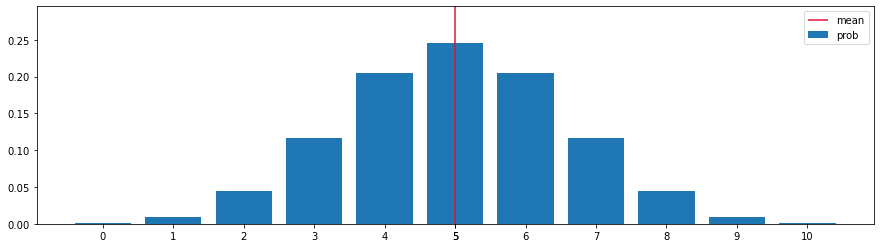

In [187]:
#[과제] 상기 이항분포의 확률함수와 기댓값을 시각화 하세요.
plot_prob(Bin(10,0.5))

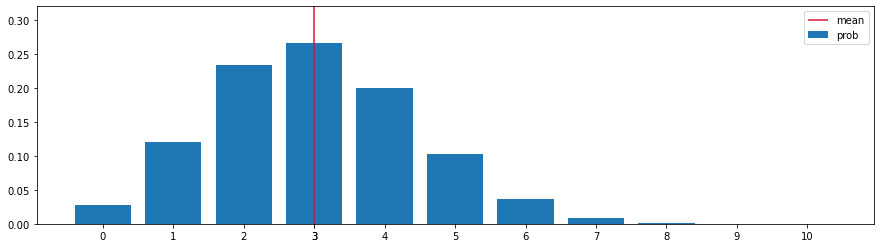

In [188]:
# 확률이 0.3, 0.5, 0.7로 변할 때 확률함수가 변화는 모습을 시각화 하세요
plot_prob(Bin(10,0.3))

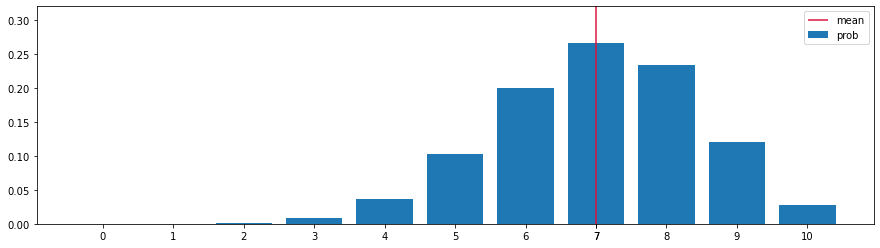

In [189]:
plot_prob(Bin(10,0.7))

#### 기하분포
- 베르누이 시행에서 처음 성공할때까지 반복한 시행 횟수가 따르는 분포
- 기하 분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3\})$

       0        (otherwise)
       
- 기하분포의 기댓값과 분산 : E(X) = 1/p, V(X) = (1-p)/$p^2$

In [154]:
#변수는 1~29로 한정
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) *p
        else:
            return 0
        
    return x_set, f

In [156]:
# [과제] 성공확률이 0.5일때 기하분포의 기댓값과 분산을 구하세요.
check_prob(Ge(0.5))

expected value 2.0
variance 2.0


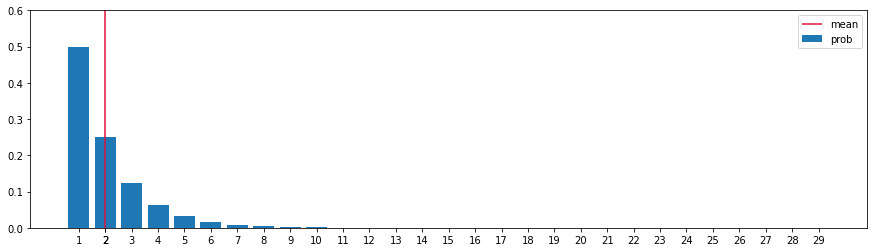

In [190]:
# [과제] 상기 기하분포의 확률함수와 기댓값을 시각화 하세요.
plot_prob(Ge(0.5))

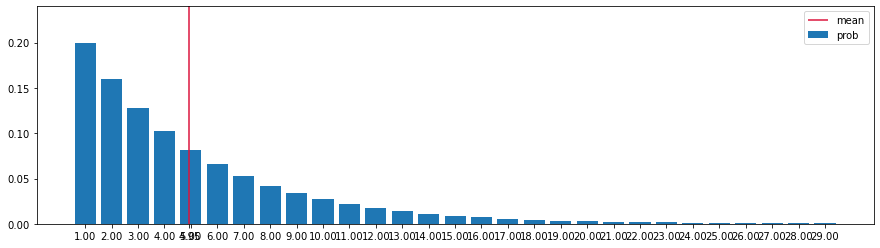

In [191]:
# [과제] 성공확률이 0.2, 0.5, 0.8로 변할 때 확률함수가 변화는 모습을 시각화 하세요
plot_prob(Ge(0.2))

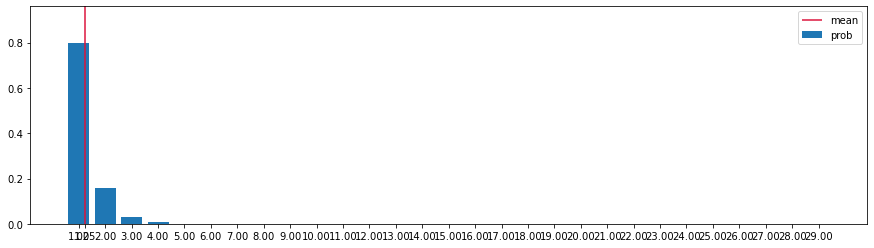

In [192]:
plot_prob(Ge(0.8))

#### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건 수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 건수는 Poi(2)를 따른다.

예 ) 하루에 교통사고가 한건도 일어나지 않을 확률

P(X=0) = 2!/0! *$e^{-2}$ = 0.135

- 포아송 분포의 기대값과 분산은 모두 $\lambda$가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$
  
      0               (otherwise)

In [175]:
# 확률 변수를 1 이상 19 이하로 설정한 사용자 함수
from scipy.special import factorial
def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return lam**x/factorial(x) * np.exp(-1*lam)
        else:
            return 0
        
    return x_set, f

In [176]:
# lambda가 0.3일때 포아송 분포의 기댓값과 분산을 구하시오
check_prob(Poi(3))

expected value 3.0
variance 3.0


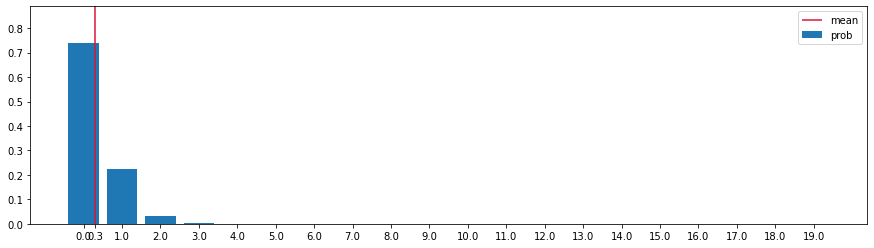

In [193]:
# 확률함수와 기대값 시각화
plot_prob(Poi(0.3))

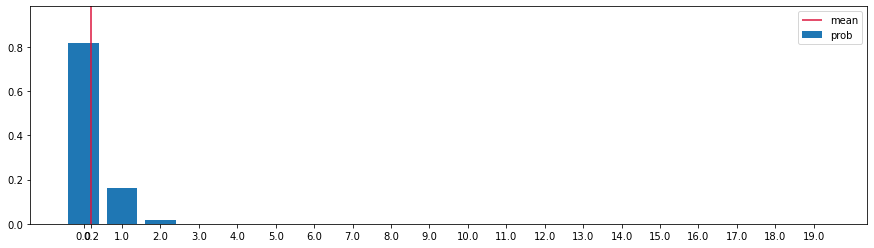

In [194]:
# lambda가 0.2 0.5 0.8로 변할 때 확률함수가 변화하는 모습을 시각화
plot_prob(Poi(0.2))

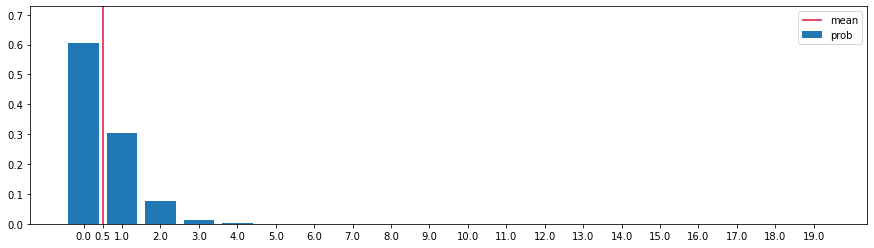

In [195]:
plot_prob(Poi(0.5))

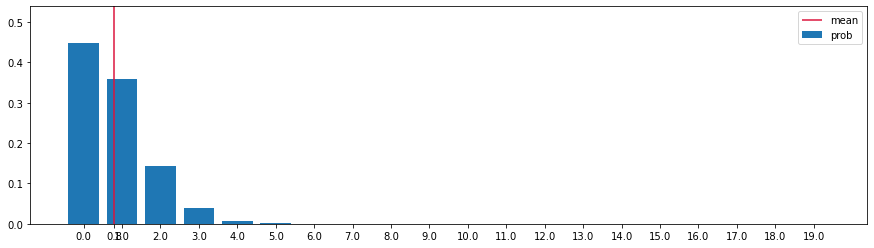

In [196]:
plot_prob(Poi(0.8))

In [ ]:
# 베르누이, 이항, 기하, 포아송 분포의 사례를 각각 2개씩 제시 및 설명

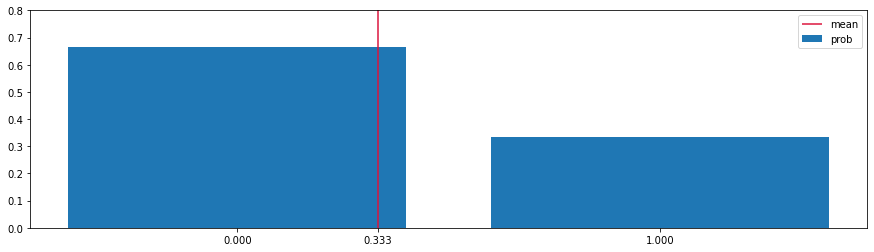

In [197]:
# 베르누이 1 : 가위바위보에서 가위를 낼 확률
def Bern1(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

plot_prob(Bern1(1/3))

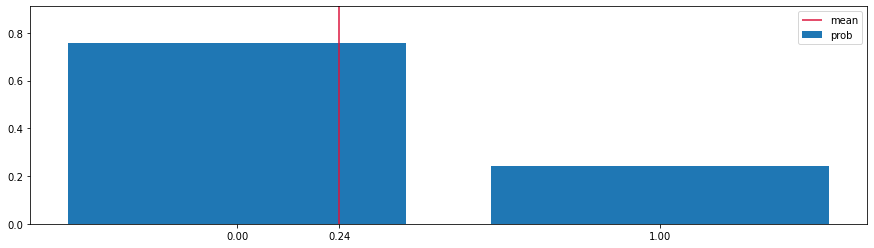

In [198]:
# 베르누이 2 : 트럼프 카드 뭉치에서 스페이드 카드를 뽑을 확률 / 트럼프 카드에 4개의 문양 * 13장의 카드 + 조커 두장
def Bern2(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p)**(1-x)
        else:
            return 0
    return x_set, f

plot_prob(Bern2(13/54))

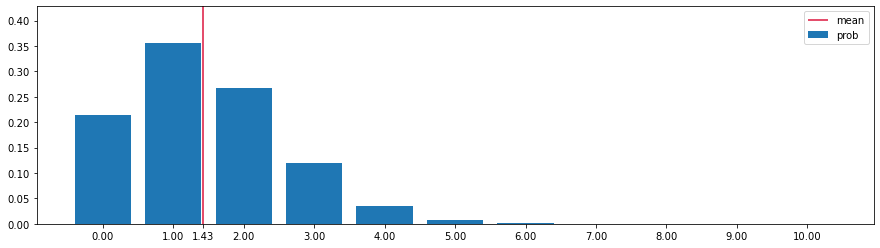

In [199]:
# 이항 분포 1 : 무지개색의 공들이 담긴 상자에서 10번을 뽑아 빨간색이 나올 확률의 분포
from scipy.special import comb
def Bin1(n,p):
    x_set = np.arange(0,n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*(p**x)*((1-p)**(n-x))
        else:
            return 0
        
    return x_set, f
plot_prob(Bin1(10,1/7))

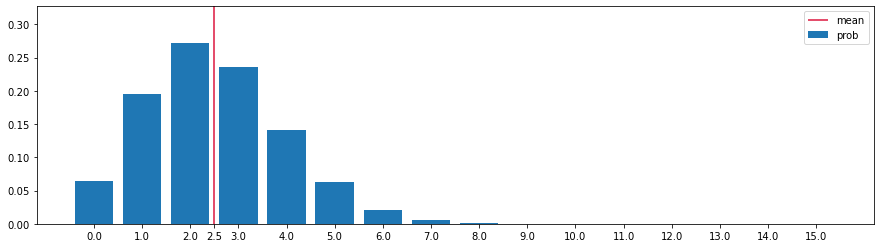

In [200]:
# 이항 분포2 : 주사위를 15번 굴려 1의 눈이 나올 확률의 분포
from scipy.special import comb
def Bin2(n,p):
    x_set = np.arange(0,n+1)
    def f(x):
        if x in x_set:
            return comb(n,x)*(p**x)*((1-p)**(n-x))
        else:
            return 0
        
    return x_set, f

plot_prob(Bin2(15,1/6))

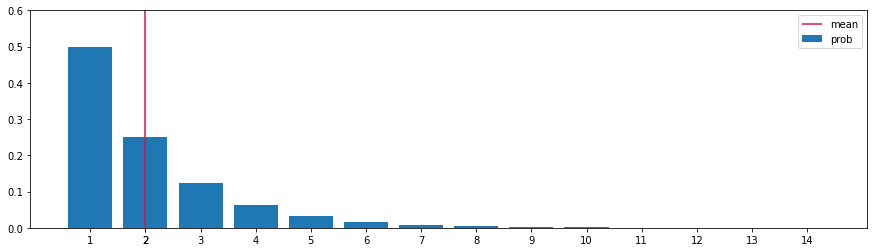

In [202]:
# 기하 분포 1: 홀짝을 맞출 확률 (최대 15번까지)
def Ge1(p):
    x_set = np.arange(1,15)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) *p
        else:
            return 0
        
    return x_set, f
plot_prob(Ge1(0.5))

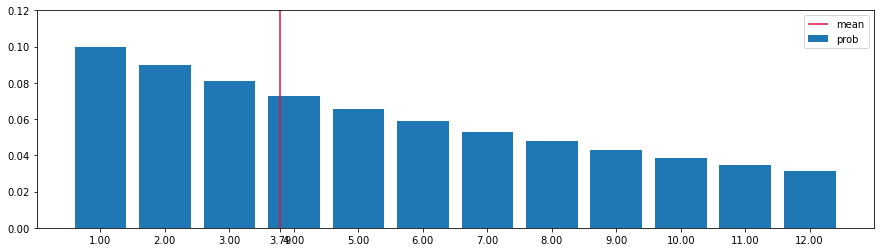

In [204]:
# 기하 분포 2: 양궁 과녁에 10점을 맞출 확률 ( 준비된 화살은 12발)
def Ge2(p):
    x_set = np.arange(1,13)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) *p
        else:
            return 0
        
    return x_set, f
plot_prob(Ge2(0.1))

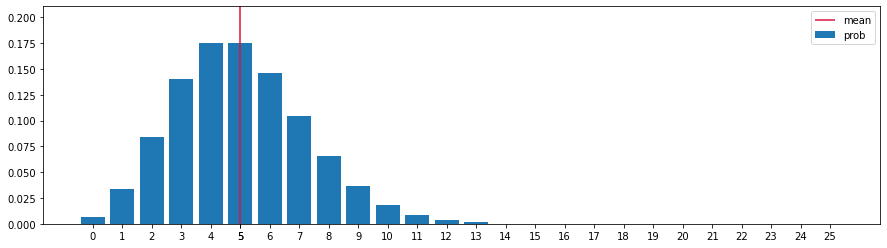

In [206]:
# 포아송 분포 1: 저녁 시간대에 평균 5건의 주문을 받는 식당의 주문 건수에 대한 확률의 분포 (최대 25건까지)
from scipy.special import factorial
def Poi1(lam):
    x_set = np.arange(26)
    def f(x):
        if x in x_set:
            return lam**x/factorial(x) * np.exp(-1*lam)
        else:
            return 0
        
    return x_set, f
plot_prob(Poi1(5))

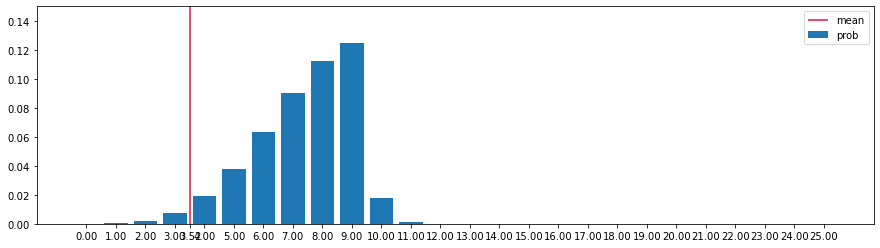

In [215]:
# 포아송 분포 2 : 하루 평균 10명이 방문하는 동물병원의 방문객 수에 대한 확률의 분포 (최대 20건까지)
from scipy.special import factorial
def Poi2(lam):
    x_set = np.arange(26)
    def f(x):
        if x in x_set:
            return (lam**x)/factorial(x) * np.exp(-1*lam)
        else:
            return 0
        
    return x_set, f
plot_prob(Poi2(10))